Mahsa Massoud - 810196635 
HW2 - Q3 part 2

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import itertools
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
dataframe = pd.read_csv('/content/drive/My Drive/sonar.all-data-2.csv')

In [4]:
x = dataframe.drop('class', inplace=False, axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataframe2 = pd.DataFrame(x_scaled)
dataframe2['class'] = dataframe['class']
dataframe = dataframe2

In [5]:
X = dataframe.drop('class', inplace = False, axis = 1)
y = dataframe['class']
temp = []
for i in range(len(y)):
    if y[i] == 'R':
        temp.append(1)
    else:
        temp.append(0)
y = temp
y = pd.Series(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [7]:
t = time.time()
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               12200     
_________________________________________________________________
dense_1 (Dense)              (None, 450)               90450     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               180400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 323,352
Trainable params: 323,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 1s 125ms/step - loss: 0.6946 - accuracy: 0.5406 - val_loss: 0.6656

In [9]:
elapsed = time.time() - t
print('Total Time : ', elapsed)

Total Time :  3.5816500186920166


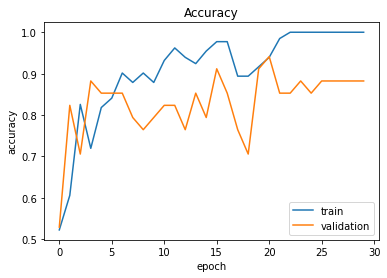

In [10]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

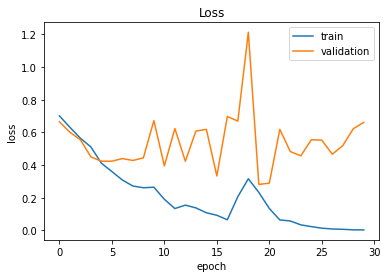

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [12]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

2/2 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8333
Test Loss 0.43485504388809204
Test Accuracy 0.8333333134651184
confusion matrix=
 [[24  3]
 [ 4 11]]


In [13]:
# second model pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)
t = time.time()
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [14]:
pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

27

In [15]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [16]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (27,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               5600      
_________________________________________________________________
dense_6 (Dense)              (None, 450)               90450     
_________________________________________________________________
dense_7 (Dense)              (None, 400)               180400    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 316,752
Trainable params: 316,752
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 1s 43ms/step - loss: 0.6679 - accuracy: 0.5930 - val_loss: 0.581

In [17]:
elapsed = time.time() - t

In [18]:
print('Total Time : ', elapsed)

Total Time :  1.1135821342468262


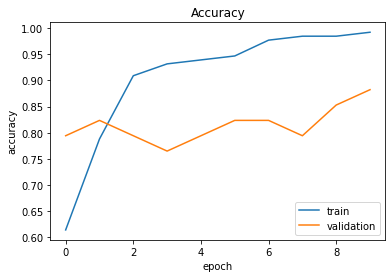

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')




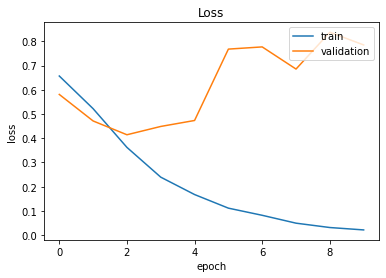

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [21]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

2/2 [==============================] - 0s 6ms/step - loss: 0.6178 - accuracy: 0.8571
Test Loss 0.6178253293037415
Test Accuracy 0.8571428656578064
confusion matrix=
 [[25  2]
 [ 4 11]]


In [22]:
#autoencoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)


In [23]:
t = time.time()

In [24]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [25]:
n_inputs = 60
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 6.0)
bottleneck = Dense(n_bottleneck)(e)

In [26]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [27]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/100
11/11 - 1s - loss: 0.6770 - val_loss: 0.1772
Epoch 2/100
11/11 - 0s - loss: 0.2487 - val_loss: 0.1549
Epoch 3/100
11/11 - 0s - loss: 0.1159 - val_loss: 0.1321
Epoch 4/100
11/11 - 0s - loss: 0.0742 - val_loss: 0.1150
Epoch 5/100
11/11 - 0s - loss: 0.0599 - val_loss: 0.1056
Epoch 6/100
11/11 - 0s - loss: 0.0480 - val_loss: 0.0994
Epoch 7/100
11/11 - 0s - loss: 0.0426 - val_loss: 0.0911
Epoch 8/100
11/11 - 0s - loss: 0.0379 - val_loss: 0.0839
Epoch 9/100
11/11 - 0s - loss: 0.0346 - val_loss: 0.0761
Epoch 10/100
11/11 - 0s - loss: 0.0339 - val_loss: 0.0684
Epoch 11/100
11/11 - 0s - loss: 0.0336 - val_loss: 0.0624
Epoch 12/100
11/11 - 0s - loss: 0.0312 - val_loss: 0.0577
Epoch 13/100
11/11 - 0s - loss: 0.0319 - val_loss: 0.0524
Epoch 14/100
11/11 - 0s - loss: 0.0307 - val_loss: 0.0489
Epoch 15/100
11/11 - 0s - loss: 0.0301 - val_loss: 0.0468
Epoch 16/100
11/11 - 0s - loss: 0.0284 - val_loss: 0.0416
Epoch 17/100
11/11 - 0s - loss: 0.0276 - val_loss: 0.0395
Epoch 18/100
11/11 - 0s

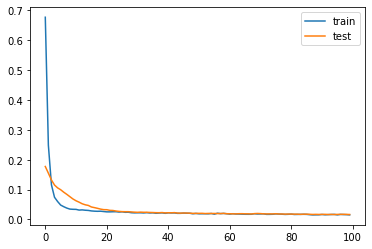

In [28]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
encoder = Model(inputs=visible, outputs=bottleneck)


In [30]:
# encode the train data
X_train_encoded = encoder.predict(X_train)
# encode the test data
X_test_encoded = encoder.predict(X_test)

In [31]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (10,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train_encoded, Y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_17 (Dense)             (None, 450)               90450     
_________________________________________________________________
dense_18 (Dense)             (None, 400)               180400    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 202       
Total params: 313,352
Trainable params: 313,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 43ms/step - loss: 0.7421 - accuracy: 0.4630 - val_loss: 0.628

In [32]:
elapsed = time.time() - t

In [33]:
print('Total Time : ', elapsed)

Total Time :  10.565760850906372


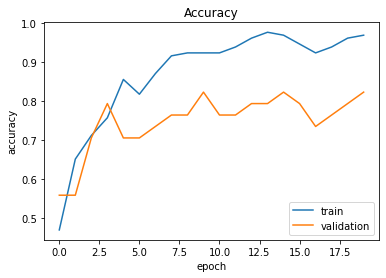

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


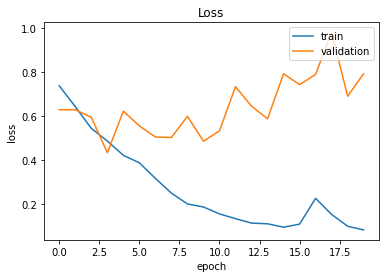

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

In [37]:
Y_pred = model.predict(X_test_encoded)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test_encoded, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

2/2 [==============================] - 0s 6ms/step - loss: 0.7816 - accuracy: 0.8333
Test Loss 0.7815537452697754
Test Accuracy 0.8333333134651184
confusion matrix=
 [[23  4]
 [ 3 12]]
